In [27]:
INPUT_IMAGE_FILE = "demo.png"
OUTPUT_SVG_FILE = "line.svg"
OUTPUT_IMAGE_FILE = "line.png"

SIN_WIDTH = 3  # Width of each curve segment
SIN_HEIGHT = 4  # Height of each curve segment
SIN_HEIGHT_CORRECTION = 16  # Correction factor for sin height
STROKE_WIDTH = 1  # Stroke width for the SVG path




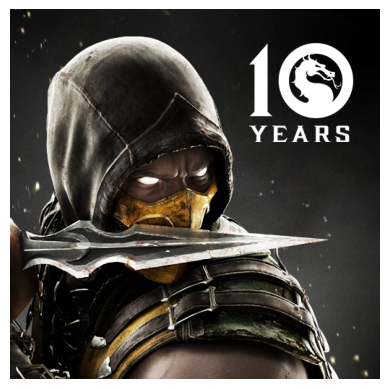

In [28]:
# show image using plot
import matplotlib.pyplot as plt
import cv2
import sys

def show_image(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if image is None:
        print(f"Error: Could not read image from {image_path}")
        sys.exit(1)

    # Convert the image from BGR to RGB format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide the axis
    plt.show()
    return image_gray

image_gray = show_image(INPUT_IMAGE_FILE)

In [29]:
# # create svg with single line goes horizontally 100px then go vertically 10px then back horizontally 100px then back vertically 10px
# # and save it as line.svg
# # background is white and line is black

# def create_svg_with_line(svg_path):
#     # Define the SVG content
#     width = image_gray.shape[1]  # Use the width of the image
#     height = image_gray.shape[0]  # Use the height of the image

#     sin_width = width // 300  # Define the width of each sinus segment
#     sin_height = height // 300  # Define the height of each sinus segment
#     svg_content = f'''<?xml version="1.0" encoding="UTF-8"?>
# <svg width="{width}" height="{height}" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
#     <rect width="{width}" height="{height}" fill="white"/>'''
#     for i in range(0, height, 2 * sin_height):
#         sinus_line = ""
#         for j in range(0, width, sin_width):
#             # get node density from image_gray
#             node_density = 1 - image_gray[i, j] / 255.0
#             # Calculate the sinusoidal offset based on the node density
#             sinus_line += f'<line x1="{j}" y1="{i}" x2="{j + sin_width / 4}" y2="{i+node_density * sin_height}" stroke="black" stroke-width="1" />\n'
#             sinus_line += f'<line x1="{j+ sin_width / 4}" y1="{i+node_density * sin_height}" x2="{j + sin_width / 2}" y2="{i}" stroke="black" stroke-width="1" />\n'
#             sinus_line += f'<line x1="{j + sin_width / 2}" y1="{i}" x2="{j + 3 * sin_width / 4}" y2="{i - node_density * sin_height}" stroke="black" stroke-width="1" />\n'
#             sinus_line += f'<line x1="{j + 3 * sin_width / 4}" y1="{i - node_density * sin_height}" x2="{j + sin_width}" y2="{i}" stroke="black" stroke-width="1" />\n'
#             # sinus_line += f'<line x1="{j}" y1="{i + sin_height}" x2="{j + sin_width}" y2="{i + sin_height + sinus_offset}" stroke="black" stroke-width="1" />\n'
#         # Add the sinusoidal line to the SVG content    
#         svg_content += sinus_line
#     svg_content += '</svg>'
#     # Write the SVG content to a file
#     with open(svg_path, 'w') as svg_file:
#         svg_file.write(svg_content)

#     print(f"SVG file created at: {svg_path}")


# create_svg_with_line("line.svg")    

# # convert svg to png using cairosvg

# def convert_svg_to_png(svg_path, png_path):
#     try:
#         cairosvg.svg2png(url=svg_path, write_to=png_path)
#         print(f"Converted {svg_path} to {png_path}")
#     except Exception as e:
#         print(f"Error converting SVG to PNG: {e}")

# convert_svg_to_png("line.svg", "line.png")

# show_image("line.png")



SVG file created at: line.svg
Converted line.svg to line.png


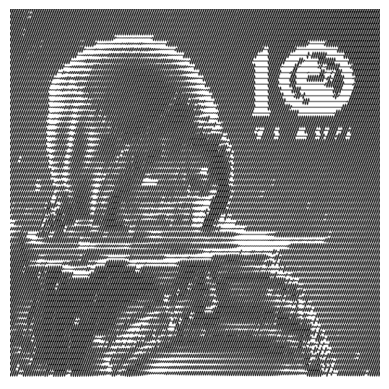

In [30]:
from pathlib import Path
from image_to_svg import create_svg_content_with_curve
from convert_svg_to_png import convert_svg_to_png

svg_content = create_svg_content_with_curve(image_gray, 
                                            sin_height=SIN_HEIGHT, 
                                            sin_width=SIN_WIDTH, 
                                            sin_height_correction=SIN_HEIGHT_CORRECTION, 
                                            stroke_width=STROKE_WIDTH)

try:
    Path(OUTPUT_SVG_FILE).write_text(svg_content, encoding='utf-8')
    print(f"SVG file created at: {OUTPUT_SVG_FILE}")
except (IOError, ValueError, IndexError) as e:
    print(f"Error creating SVG {OUTPUT_SVG_FILE}: {e}")
    
if convert_svg_to_png(OUTPUT_SVG_FILE, OUTPUT_IMAGE_FILE):
    show_image(OUTPUT_IMAGE_FILE)


